In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import seaborn as sns


WE WILL START WITH DATA VISUALIZATION


In [2]:
os.getcwd()

'C:\\Users\\risha\\galaxy_morphology\\python_dep'

In [3]:
path="C:/Users/risha/OneDrive - iitkgp.ac.in/galaxy/galaxy-zoo-the-galaxy-challenge"

In [4]:
path_csv=os.path.join(path,"training_solutions_rev1.zip")
training_sol=pd.read_csv(path_csv,compression="zip")


In [5]:
#first 5 rows
training_sol.head()


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [6]:
print(training_sol.shape)
#appendin .jpg to the dataframe
def append(filename):
    return f"{filename}.jpg"
training_sol["GalaxyID"] = training_sol["GalaxyID"].apply(append)
training_sol

(61578, 38)


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008.jpg,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023.jpg,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053.jpg,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078.jpg,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948.jpg,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950.jpg,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958.jpg,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964.jpg,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [7]:
training_sol[(training_sol["Class1.1"]>0.75)|(training_sol["Class1.2"]>0.75)].shape

(30610, 38)

In [8]:
training_sol[(training_sol["Class1.2"]>0.75)].shape

(19447, 38)

In [9]:
training_sol[(training_sol["Class1.1"]>0.75)&(training_sol["Class1.2"]>0.75)].shape
#we can see there is no training row which have both category with 0.75

(0, 38)

In [10]:
data=training_sol[(training_sol["Class1.1"]>0.75)|(training_sol["Class1.2"]>0.75)]

In [11]:
data.isnull().sum().sum()
#there is no null data

0

In [12]:
conditions = [data["Class1.1"] >= 0.75, 
              data["Class1.2"] >= 0.75]

#define choices
choices = ["elliptical", "spiral"]

#create new column in DataFrame that displays results of comparisons
data["class"] = np.select(conditions, choices, default="Tie")
data["class"]

C:\Users\risha\AppData\Local\Temp\ipykernel_3356\3692901759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["class"] = np.select(conditions, choices, default="Tie")


2        elliptical
4        elliptical
8            spiral
14           spiral
16           spiral
            ...    
61568        spiral
61574    elliptical
61575        spiral
61576        spiral
61577    elliptical
Name: class, Length: 30610, dtype: object

In [13]:
data.iloc[2,:]

GalaxyID     100134.jpg
Class1.1       0.021834
Class1.2       0.976952
Class1.3       0.001214
Class2.1       0.021751
Class2.2       0.955201
Class3.1       0.313077
Class3.2       0.642124
Class4.1       0.546491
Class4.2       0.408711
Class5.1       0.160096
Class5.2       0.760688
Class5.3       0.034417
Class5.4            0.0
Class6.1       0.611499
Class6.2       0.388501
Class7.1       0.010917
Class7.2       0.010917
Class7.3            0.0
Class8.1            0.0
Class8.2       0.032377
Class8.3       0.064143
Class8.4       0.450225
Class8.5            0.0
Class8.6       0.032377
Class8.7       0.032377
Class9.1            0.0
Class9.2            0.0
Class9.3       0.021751
Class10.1      0.207253
Class10.2      0.152044
Class10.3      0.187194
Class11.1           0.0
Class11.2           0.0
Class11.3      0.054649
Class11.4      0.081974
Class11.5      0.081974
Class11.6      0.327894
class            spiral
Name: 8, dtype: object

In [14]:
#Let us see if there is any value of class1.3 which is greater than .75
data[data["Class1.3"]>0.75].shape
#There is no such cells
data.sort_values("Class1.3",ascending=False)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,class
15421,328346.jpg,0.754358,0.000000,0.245642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,elliptical
50068,829044.jpg,0.759340,0.000000,0.240660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,elliptical
22110,423362.jpg,0.785444,0.000000,0.214556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,elliptical
39957,682214.jpg,0.766000,0.021000,0.213000,0.000000,0.021000,0.000000,0.021000,0.000000,0.021000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,elliptical
42263,716919.jpg,0.788040,0.000000,0.211960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,elliptical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19576,387356.jpg,0.025434,0.974566,0.000000,0.073503,0.901063,0.110631,0.790433,0.901063,0.000000,...,0.572496,0.328567,0.000000,0.0,0.686657,0.0,0.065108,0.0,0.149298,spiral
19575,387330.jpg,0.215939,0.784061,0.000000,0.000000,0.784061,0.000000,0.784061,0.450737,0.333324,...,0.244019,0.206718,0.000000,0.0,0.169030,0.0,0.000000,0.0,0.281707,spiral
42731,723668.jpg,0.800504,0.199496,0.000000,0.000000,0.199496,0.000000,0.199496,0.163507,0.035989,...,0.000000,0.081754,0.081754,0.0,0.000000,0.0,0.000000,0.0,0.163507,elliptical
42734,723786.jpg,0.781087,0.218913,0.000000,0.072898,0.146015,0.000000,0.146015,0.000000,0.146015,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,elliptical


In [15]:
#data=data.reset_index()
#print(data)
#data.drop(columns=["index"])

In [16]:
print(data[data["class"]=="spiral"].shape)
print(data[data["class"]=="elliptical"].shape)

(19447, 39)
(11163, 39)


In [17]:
data_spirals=data[data["class"]=="spiral"].sample(n=10000,random_state = 73)
data_elliptical=data[data["class"]=="elliptical"].sample(n=10000,random_state = 21)
data[data["class"]=="spiral"]

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,class
8,100134.jpg,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894,spiral
14,100237.jpg,0.164391,0.800759,0.034850,0.030795,0.769964,0.149037,0.620928,0.387742,0.382223,...,0.208685,0.179056,0.000000,0.032728,0.140980,0.000000,0.000000,0.089185,0.124848,spiral
16,100263.jpg,0.179654,0.818530,0.001816,0.573791,0.244739,0.047326,0.197413,0.016623,0.228116,...,0.000000,0.007855,0.008768,0.000000,0.000000,0.000000,0.000000,0.000000,0.016623,spiral
19,100322.jpg,0.091987,0.908013,0.000000,0.816806,0.091207,0.000000,0.091207,0.000000,0.091207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,spiral
20,100335.jpg,0.165002,0.834998,0.000000,0.235325,0.599673,0.148674,0.450999,0.378226,0.221447,...,0.047278,0.236391,0.094556,0.141835,0.094556,0.000000,0.000000,0.000000,0.141835,spiral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61563,999777.jpg,0.013522,0.983796,0.002681,0.015684,0.968112,0.590285,0.377827,0.924279,0.043833,...,0.346315,0.327666,0.250298,0.025757,0.832544,0.041435,0.000000,0.000000,0.024542,spiral
61566,999795.jpg,0.129878,0.867781,0.002341,0.066500,0.801281,0.598990,0.202291,0.550301,0.250981,...,0.249742,0.172674,0.127884,0.142373,0.048823,0.038712,0.000000,0.123529,0.196864,spiral
61568,999875.jpg,0.020285,0.979715,0.000000,0.207551,0.772164,0.315305,0.456860,0.722483,0.049681,...,0.074294,0.029641,0.618548,0.027295,0.638331,0.000000,0.000000,0.000000,0.056857,spiral
61575,999958.jpg,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.000000,0.072296,spiral


In [21]:
data_combined=pd.concat([data_spirals,data_elliptical])
data_galaxy=data_combined[["GalaxyID","class"]]
data_galaxy

,GalaxyID,class
6023,188958.jpg,spiral
23108,437459.jpg,spiral
55740,914433.jpg,spiral
33115,585542.jpg,spiral
5854,186722.jpg,spiral
...,...,...
44585,750222.jpg,elliptical
60298,981563.jpg,elliptical
17151,352411.jpg,elliptical
60552,985234.jpg,elliptical


In [25]:
data_galaxy=data_galaxy.sample(frac=1).reset_index(drop=True)
data_galaxy.head(50)

,GalaxyID,class
0,802595.jpg,elliptical
1,986400.jpg,spiral
2,371334.jpg,elliptical
3,319686.jpg,elliptical
4,500977.jpg,spiral
5,799270.jpg,spiral
6,108672.jpg,elliptical
7,425549.jpg,elliptical
8,678059.jpg,spiral
9,816126.jpg,elliptical


In [26]:
import zipfile
path_train_images=os.path.join(path,"images_training_rev1.zip")
with zipfile.ZipFile(path_train_images, 'r') as zip_ref:
    zip_ref.extractall()

Text(0.5, 1.02, 'Elliptical Galaxy')

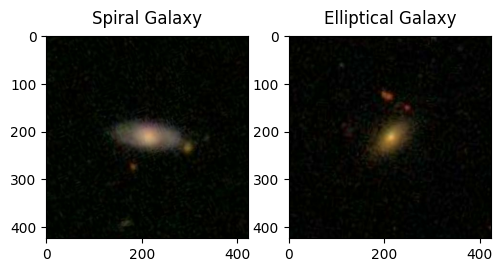

In [27]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

#images
img_1= tf.io.read_file("./images_training_rev1/585542.jpg")
img_1=tf.io.decode_image(img_1)
img_2 =tf.io.read_file("./images_training_rev1/985234.jpg")
img_2=tf.io.decode_image(img_2)
#Subplots
plt.figure(figsize=(12,4.5))
plt.subplot(141)
plt.imshow(img_1)
plt.title("Spiral Galaxy", y=1.02, fontsize=12)

plt.subplot(142)
plt.imshow(img_2)
plt.title("Elliptical Galaxy", y=1.02, fontsize=12)


In [28]:
img_2.shape

TensorShape([424, 424, 3])

In [29]:
#methodology and Model Training with data Augmentation
from sklearn.model_selection import train_test_split
preprocess_image_train=image.ImageDataGenerator(
    #featurewise_center=True,
    rotation_range=22,
    zoom_range=0.2,
    rescale=1.0/255,
    horizontal_flip=True,
    vertical_flip=True,
)
preprocess_image_validation=image.ImageDataGenerator(rescale=1.0/255,)
data_train, data_validation = train_test_split(data_galaxy, test_size=.2)
train_generator = preprocess_image_train.flow_from_dataframe(
        dataframe = data_train,
        target_size = (212,212),
       directory = "./images_training_rev1",
       batch_size = 32,
       x_col="GalaxyID",
      y_col="class",
      color_mode="rgb",
     class_mode="categorical",
     subset="training",
     shuffle=True,
     seed=412)
validation_generator = preprocess_image_train.flow_from_dataframe(
        dataframe = data_validation,
        target_size = (212,212),
       directory = "./images_training_rev1",
       batch_size = 32,
       x_col="GalaxyID",
      y_col="class",
      color_mode="rgb",
     class_mode="categorical",
     subset="training",
     shuffle=True,
     seed=412)


Found 16000 validated image filenames belonging to 2 classes.
Found 4000 validated image filenames belonging to 2 classes.


In [30]:
#Model Training
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


In [36]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(5,5),activation="relu",input_shape=(212,212,3)),
    tf.keras.layers.Conv2D(32,(5,5),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(4,4),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")]
)

In [37]:
summary = model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 208, 208, 16)      1216      
                                                                 
 conv2d_5 (Conv2D)           (None, 204, 204, 32)      12832     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 102, 102, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 99, 99, 64)        32832     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 128)      

In [38]:
#creating a checkpoint to save the best model
checkpoint = ModelCheckpoint("best_model3.h5", 
                             monitor = "val_loss",
                             verbose = 1, 
                             save_best_only = True, 
                             mode = "auto")
#Specifying an earlystopping to avoid overfitting
stopping = EarlyStopping(monitor = "val_loss",
                         patience = 10,#after this many epochs,stop the model training
                         verbose = 1,
                         mode = "auto")

In [39]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

In [40]:
model.fit(train_generator,epochs=10,validation_data=validation_generator, 
                callbacks = [checkpoint, stopping],verbose=1
)

Epoch 1/10
500/500 [==============================] - ETA: 0s - loss: 0.3674 - accuracy: 0.8310
Epoch 1: val_loss improved from inf to 0.25266, saving model to best_model3.h5
500/500 [==============================] - 3703s 7s/step - loss: 0.3674 - accuracy: 0.8310 - val_loss: 0.2527 - val_accuracy: 0.9030
Epoch 2/10
500/500 [==============================] - ETA: 0s - loss: 0.2293 - accuracy: 0.9143
Epoch 2: val_loss improved from 0.25266 to 0.16896, saving model to best_model3.h5
500/500 [==============================] - 2589s 5s/step - loss: 0.2293 - accuracy: 0.9143 - val_loss: 0.1690 - val_accuracy: 0.9375
Epoch 3/10
500/500 [==============================] - ETA: 0s - loss: 0.1886 - accuracy: 0.9266
Epoch 3: val_loss did not improve from 0.16896
500/500 [==============================] - 4650s 9s/step - loss: 0.1886 - accuracy: 0.9266 - val_loss: 0.1873 - val_accuracy: 0.9258
Epoch 4/10
500/500 [==============================] - ETA: 0s - loss: 0.1702 - accuracy: 0.9376
Epoch 4:

In [41]:
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(model, 'rishav_model.pkl')

['rishav_model.pkl']